# Кластеризация 2025

**Цель работы:**

Изучение алгоритмов и методов кластеризации на практике.

**Вариант 8(3)**

### Часть 1

Первым делом сгенерируем датасет, содержащий два параметра: x и y

In [4]:
import numpy as np
import pandas as pd
def make_data(n, seed):
 np.random.seed(seed)

 shift_matrix = np.array([[3, 3],
 [6, 9],
 [9, 3]])

 data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
 data = np.swapaxes(data, 1, 2)
 data = data.reshape((-1, 2))
 data *= np.array([[20, 0.5]])

 df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
 columns=['x', 'y'])
 df = df.sample(frac=1.0)
 return df


Применим написанную функцию, сгенерировав датасет из трёх кластеров, по 50 элементов каждый

In [5]:
df = make_data(50, 0)
df.reset_index(drop=True, inplace=True)


Выполняем стандартизацию данных

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # создание объекта класса Scaler
df_scaled = scaler.fit_transform(df) # преобразование данных с помощью transform

Обучение модели для кластеризации методом KMeans

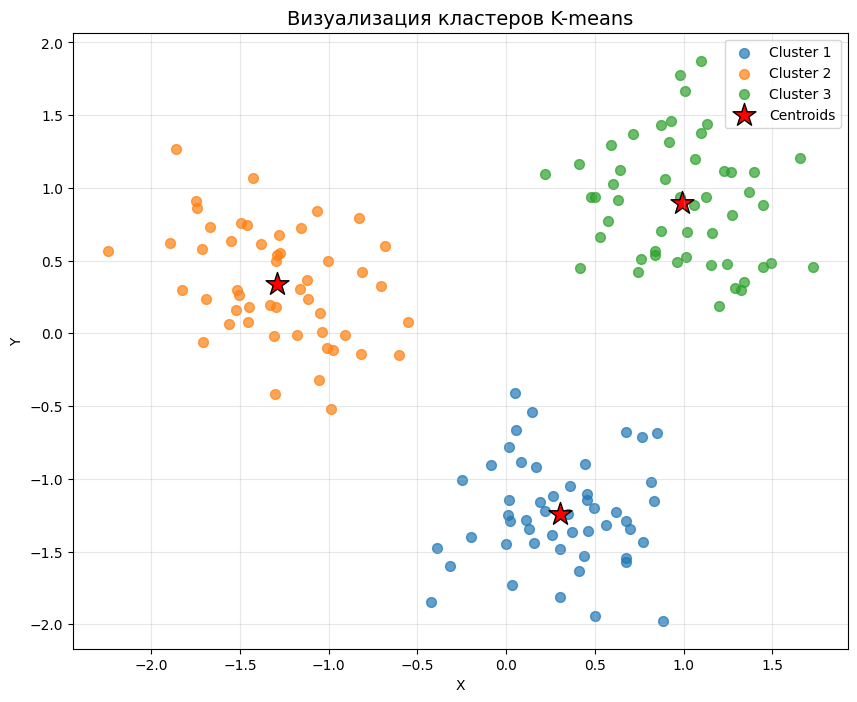

Коэффициент силуэта: 0.6904


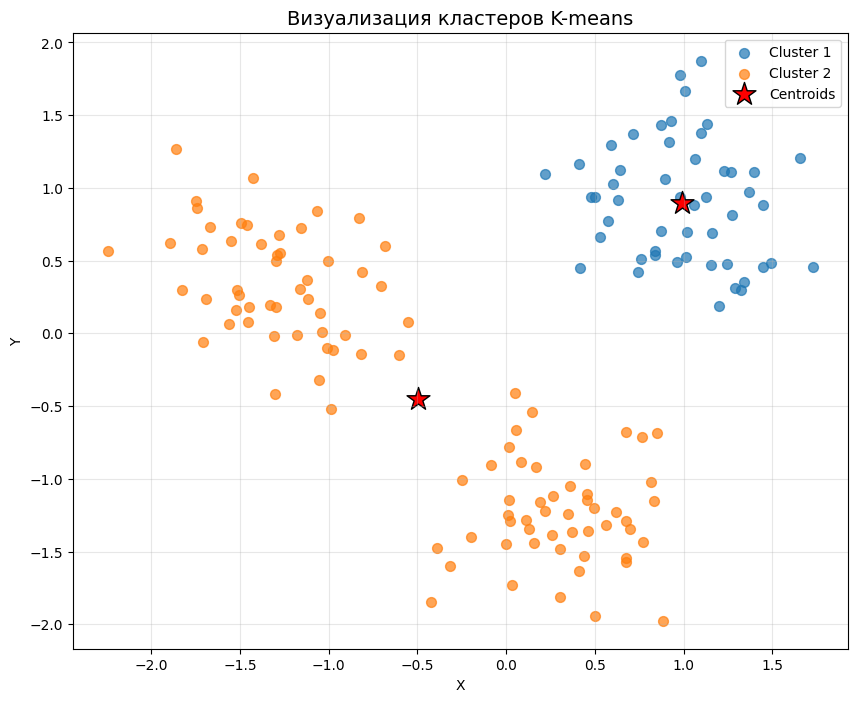

Коэффициент силуэта: 0.4809


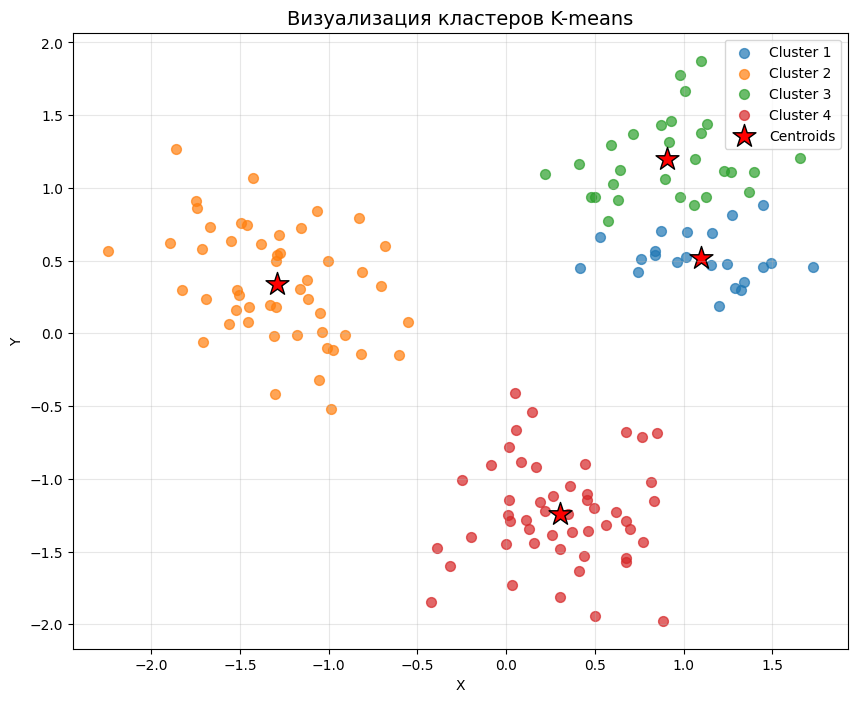

Коэффициент силуэта: 0.5721


array([1, 3, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 0, 1, 1, 0,
       3, 3, 2, 3, 1, 0, 3, 3, 1, 3, 1, 2, 1, 3, 3, 3, 1, 2, 3, 3, 2, 1,
       2, 1, 0, 1, 1, 2, 3, 1, 2, 3, 1, 2, 2, 2, 3, 1, 3, 2, 2, 1, 1, 0,
       1, 1, 1, 3, 0, 1, 2, 1, 1, 2, 3, 1, 0, 0, 1, 1, 0, 3, 2, 2, 3, 2,
       1, 0, 1, 0, 1, 3, 3, 2, 2, 2, 0, 3, 2, 2, 3, 3, 1, 1, 1, 3, 1, 0,
       3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 1, 0, 2, 3, 0, 3, 0, 3, 3, 3, 2, 3,
       3, 1, 2, 3, 1, 1, 0, 2, 3, 3, 3, 3, 0, 2, 1, 3, 0, 3], dtype=int32)

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

def clusterization(X, n_clusters):
    k_means = KMeans(n_clusters=n_clusters, random_state=0)

    clusters = k_means.fit_predict(X)
    centroids = k_means.cluster_centers_

    pca = PCA(n_components=0.85)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(10, 8))

    for i in range(n_clusters):
        plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], 
                    s=50, label=f'Cluster {i+1}', alpha=0.7)

    # Отмечаем центроиды в PCA пространстве
    centroids_pca = pca.transform(centroids)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
                marker='*', s=300, c='red', label='Centroids', edgecolors='black')

    plt.title('Визуализация кластеров K-means', fontsize=14)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    silhouette = silhouette_score(X, clusters)
    print(f"Коэффициент силуэта: {silhouette:0.4f}")    

    return clusters

clusterization(df_scaled, 3)
clusterization(df_scaled, 2)
clusterization(df_scaled, 4)


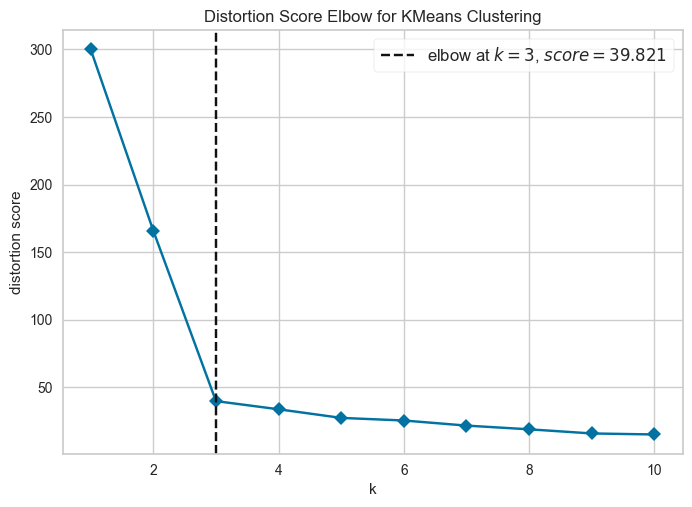

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,11), timings=False)
visualizer.fit(df_scaled)
visualizer.show()

**Выводы**

Количество кластеров, равное 3 можем считать оптимальным, так как при таком числе кластеров коэффициент силуэта наибольший, что говорит о высоком качестве кластеризации

Кроме этого, при определении оптимального количества кластервов методом локтя видно,что "перелом" графика происходит в точке 3. Значит отимальное количество кластров - 3.

### Часть 2

Для выполнения второй части выбран вариант задания 3. Выполним импорт датасета, изучим типы данных.

In [9]:
df = pd.read_csv('ecommerce_fraud.csv')
df.head(10)

,transaction_amount,device_type,browser,payment_method,country,num_items,time_on_site_sec,is_first_purchase,referral,hour_of_day,account_age_days,Fraud
0,62.18,Desktop,Safari,COD,UK,3,58.0,No,Direct,15,808,0
1,28.16,Desktop,Chrome,COD,US,2,75.0,Yes,Direct,10,753,0
2,17.57,Mobile,Chrome,Card,DE,1,101.0,No,Social,21,1017,0
3,61.61,Desktop,Safari,PayPal,Other,4,63.0,Yes,Search,20,1146,0
4,4.28,Desktop,Edge,Card,BR,7,399.0,No,Direct,4,1134,0
5,1.85,Desktop,Firefox,Card,IN,5,307.0,Yes,Search,23,674,0
6,12.50,Mobile,Chrome,PayPal,US,4,381.0,No,Search,2,1712,0
7,35.30,Desktop,Safari,Card,IN,3,98.0,No,Search,6,1370,0
8,81.59,Mobile,Firefox,Card,FR,1,257.0,Yes,Direct,17,1574,0
9,46.25,Mobile,Chrome,BankTransfer,IN,5,137.0,No,Search,3,224,0


Закодируем категориальные данные для правильного учёта их в алгоритме кластеризации

In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = oe.fit_transform(pd.DataFrame(df[col]))

#### Матрица диаграмм рассеивания

Целевая переменная - это Fraud. Красным на диаграммах обозначены мошеннические транзакции, синим - обычные.

Размер признакового пространства: (3024, 11)
Распределение целевой переменной:
Fraud
0    2889
1     135
Name: count, dtype: int64
Процент мошеннических транзакций: 4.46%

Создание матрицы диаграмм рассеяния...


<Figure size 1500x1000 with 0 Axes>

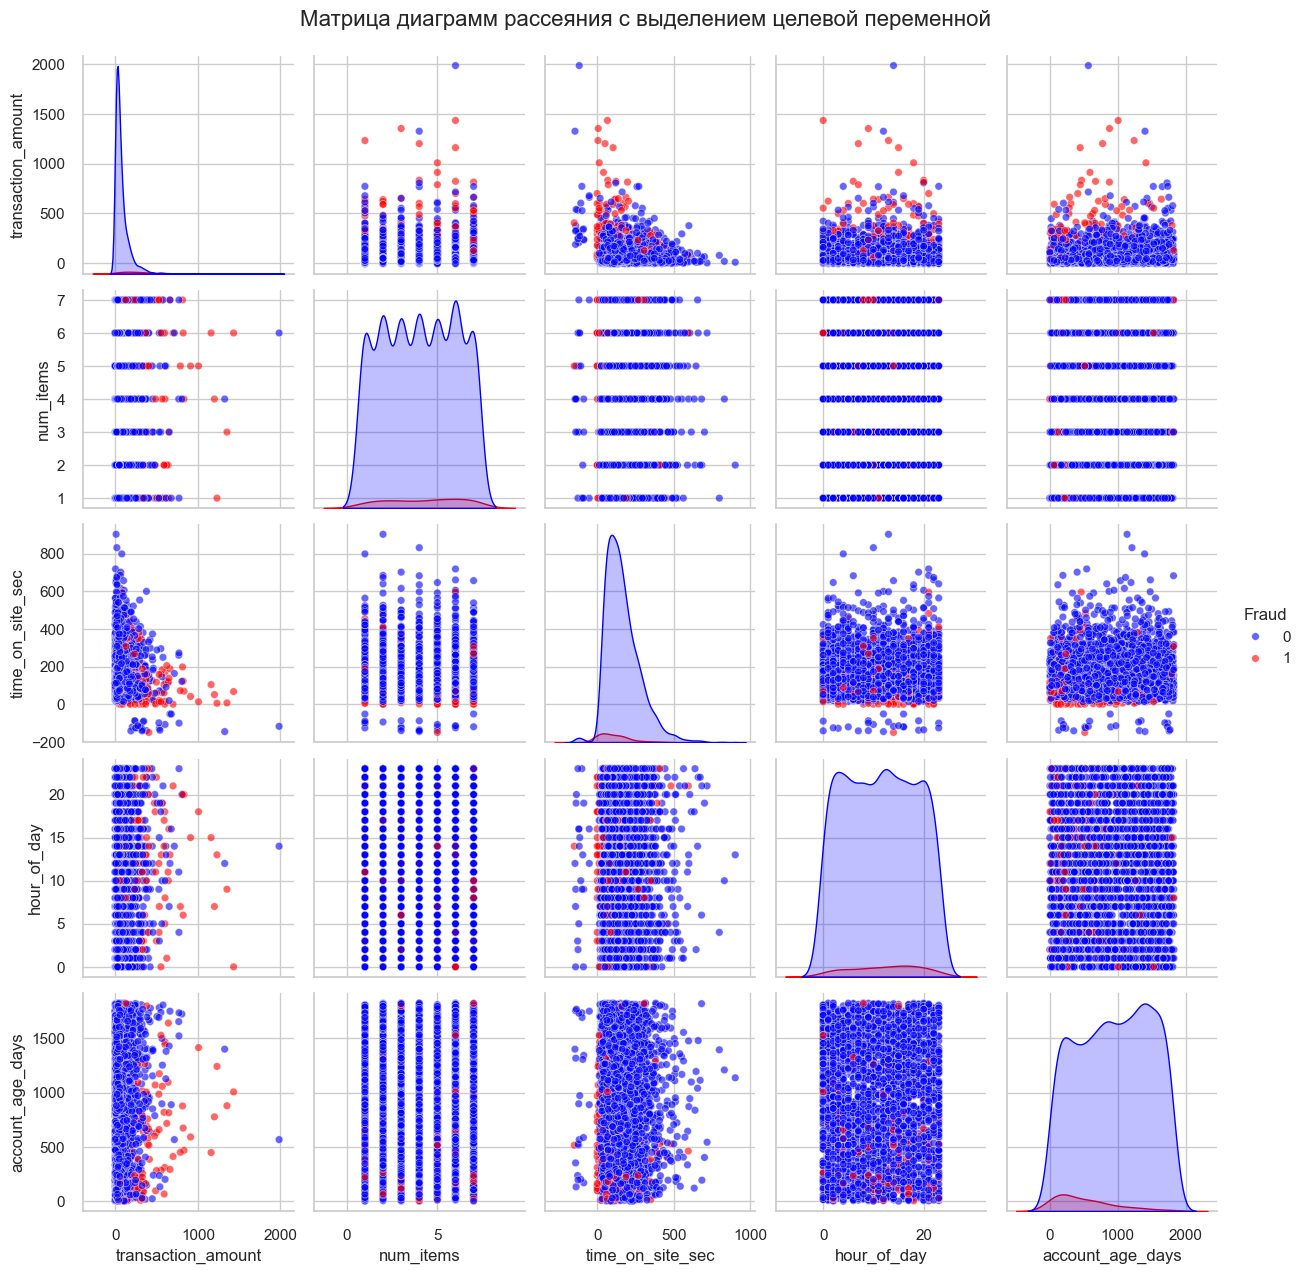

<Figure size 800x550 with 0 Axes>

In [11]:
import seaborn as sns

X = df.drop('Fraud', axis=1)
y = df['Fraud']

print(f"Размер признакового пространства: {X.shape}")
print(f"Распределение целевой переменной:")
print(y.value_counts())
print(f"Процент мошеннических транзакций: {y.mean()*100:.2f}%")

numeric_features = ['transaction_amount', 'num_items', 'time_on_site_sec', 
                   'hour_of_day', 'account_age_days', 'transaction_amount_abs']
numeric_features = [col for col in numeric_features if col in X.columns]


X_viz = X[numeric_features].copy()
X_viz['Fraud'] = y.values

print("\nСоздание матрицы диаграмм рассеяния...")

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
sns.pairplot(X_viz, hue='Fraud', palette={0: 'blue', 1: 'red'}, 
             plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('Матрица диаграмм рассеяния с выделением целевой переменной', 
             y=1.02, fontsize=16)
plt.show()
plt.tight_layout()
plt.show()

Масштабируем данные методом StandardScaler.

In [12]:
df_with_clusters = df.copy()

y = df['Fraud']
X = df.drop('Fraud', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Метод локтя

Определяем оптимальное количество кластеров по методу локтя

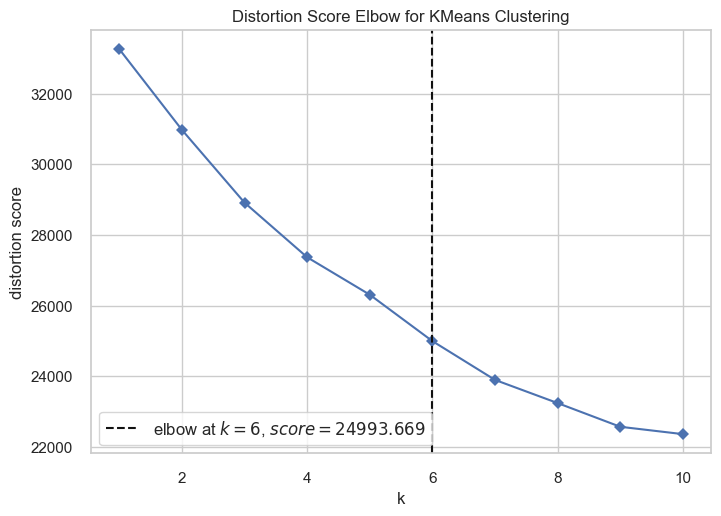

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,11), timings=False)
visualizer.fit(X_scaled)
visualizer.show()

Оптимальное количество кластеров - 6. Используем это при выполнении кластеризации методом KMeans.

В данном случае используется метод главных компонент (PCA), который позволяет преобразовать многомерный набор данных и спроецировать на плоскость.

Первая главная компонента - это направление, вдоль которого разброс данных максимален. Она содержит максимальную информацию о различиях в данных.

Вторая главная компонента перпендикулярна первой и содержит вторую по значимости часть вариативности, и т.д. Каждая следующая компонента объясняет всё меньшую часть общей дисперсии данных.

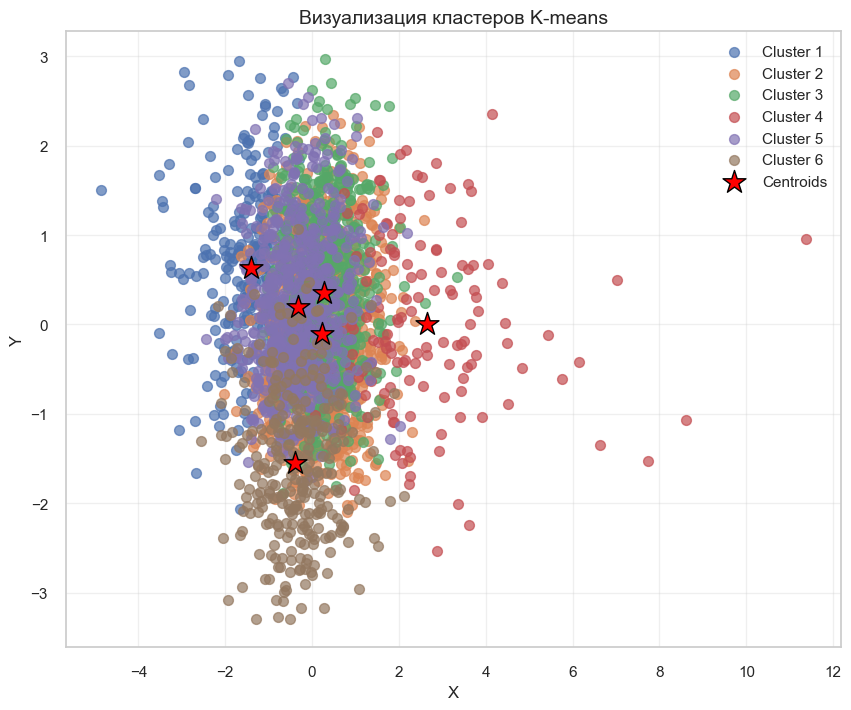

Коэффициент силуэта: 0.0821


In [14]:
clusters = clusterization(X=X_scaled, n_clusters = 6)

Рассчитаем средние показатели для каждого кластера. Для категориальных данных определим моду.

In [15]:
# Создаем копию датафрейма с кластерами
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters

def calculate_cluster_statistics(df_with_clusters):
    # Группируем по кластерам и вычисляем статистику
    cluster_stats = df_with_clusters.groupby('Cluster').agg({
        'transaction_amount': 'mean',
        'num_items': 'mean',
        'time_on_site_sec': 'mean',
        'hour_of_day': 'mean',
        'account_age_days': 'mean',
        'device_type': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
        'browser': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
        'payment_method': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
        'country': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
        'is_first_purchase': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
        'referral': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
        'Fraud': 'mean'
    }).round(2)
    
    # Добавляем размер кластера
    cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
    cluster_stats['Cluster_Size'] = cluster_sizes
    cluster_stats['Cluster_Size_Pct'] = (cluster_sizes / len(df_with_clusters) * 100).round(1)
    
    # Переименовываем столбцы для лучшей читаемости
    cluster_stats = cluster_stats.rename(columns={
        'transaction_amount': 'Avg_Transaction_Amount',
        'num_items': 'Avg_Num_Items',
        'time_on_site_sec': 'Avg_Time_On_Site',
        'hour_of_day': 'Avg_Hour_Of_Day',
        'account_age_days': 'Avg_Account_Age_Days',
        'device_type': 'Mode_Device_Type',
        'browser': 'Mode_Browser',
        'payment_method': 'Mode_Payment_Method',
        'country': 'Mode_Country',
        'is_first_purchase': 'Mode_Is_First_Purchase',
        'referral': 'Mode_Referral_Source',
        'Fraud': 'Fraud_Rate'
    })
    
    return cluster_stats

# Вычисляем статистику для e-commerce датасета
cluster_stats = calculate_cluster_statistics(df_with_clusters)
print("СРЕДНИЕ ПОКАЗАТЕЛИ ПО КЛАСТЕРАМ (E-COMMERCE FRAUD):")
display(cluster_stats)

СРЕДНИЕ ПОКАЗАТЕЛИ ПО КЛАСТЕРАМ (E-COMMERCE FRAUD):


,Avg_Transaction_Amount,Avg_Num_Items,Avg_Time_On_Site,Avg_Hour_Of_Day,Avg_Account_Age_Days,Mode_Device_Type,Mode_Browser,Mode_Payment_Method,Mode_Country,Mode_Is_First_Purchase,Mode_Referral_Source,Fraud_Rate,Cluster_Size,Cluster_Size_Pct
Cluster,,,,,,,,,,,,,,
0,68.73,4.27,398.50,11.47,853.96,1.0,0.0,2.0,7.0,0.0,2.0,0.03,300,9.9
1,62.47,3.95,140.38,11.01,942.26,0.0,0.0,2.0,7.0,1.0,2.0,0.04,963,31.8
2,60.99,4.06,139.85,12.00,860.92,1.0,0.0,2.0,7.0,0.0,1.0,0.03,678,22.4
3,514.42,3.90,85.93,12.22,948.13,0.0,0.0,2.0,7.0,0.0,2.0,0.41,134,4.4
4,65.33,4.06,130.33,11.22,985.03,1.0,0.0,2.0,0.0,0.0,2.0,0.01,653,21.6
5,73.58,4.03,159.74,11.09,917.16,1.0,0.0,0.0,7.0,0.0,2.0,0.02,296,9.8


In [16]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score 

def calculate_hcv(y_true, y_pred):    
    # Вычисляем метрики
    homogeneity = homogeneity_score(y_true, y_pred)
    completeness = completeness_score(y_true, y_pred)
    v_measure = v_measure_score(y_true, y_pred)
    
    metrics = {
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-measure': v_measure
    }
    
    print(f"1. Homogeneity Score: {homogeneity:.4f}")
    print(f"2. Completeness Score: {completeness:.4f}")
    print(f"3. V-measure Score: {v_measure:.4f}")
    
    return metrics

def calculate_hcv_no_print(y_true, y_pred):    
    # Вычисляем метрики
    homogeneity = homogeneity_score(y_true, y_pred)
    completeness = completeness_score(y_true, y_pred)
    v_measure = v_measure_score(y_true, y_pred)
    
    metrics = {
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-measure': v_measure
    }
    
    return metrics

metrics = calculate_hcv(y, clusters)

1. Homogeneity Score: 0.1812
2. Completeness Score: 0.0203
3. V-measure Score: 0.0366


### Дендрограмма

Построим дендрограмму для определения оптимального количества кластеров

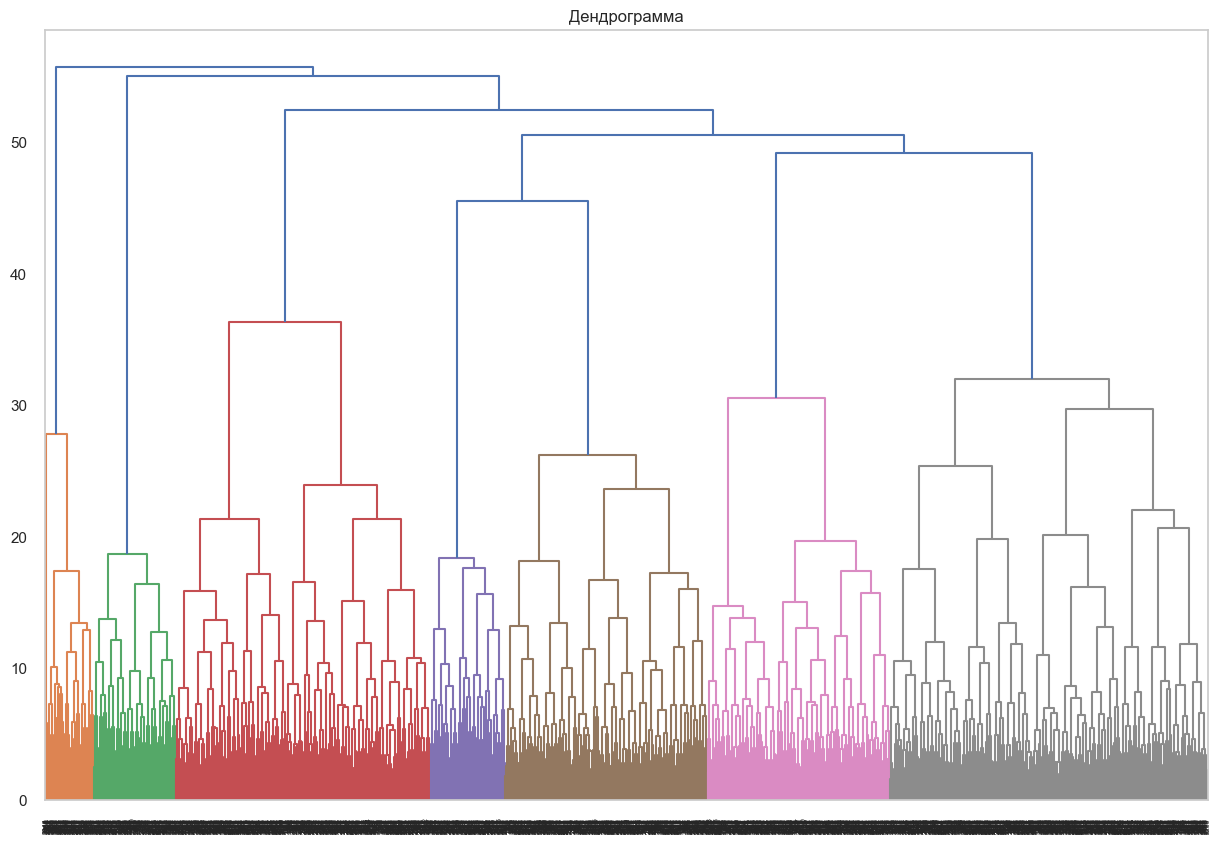

In [17]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# импорт классов модули кластеризации linkage() и dendrogram()
# стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') # таблица «связок» между объектами
# Визуализация дендрограммы
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.grid(False)
plt.title('Дендрограмма')
plt.show()

Получаем количество кластеров равное 7. Выполним кластеризацию методом AgglomerativeClustering

In [18]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=7)
# model.fit(X)
pred = model.fit_predict(X)
print(f'Коэффициент силуэта: {silhouette_score(X, pred):.4f}')

Коэффициент силуэта: 0.2974


Вычислим средние показатели и метрики качества для всех кластеров:

In [19]:
df_with_clusters['Cluster'] = pred
cluster_stats = calculate_cluster_statistics(df_with_clusters)
print("СРЕДНИЕ ПОКАЗАТЕЛИ ПО КЛАСТЕРАМ:")
display(cluster_stats)

metrics = calculate_hcv(y, pred)

СРЕДНИЕ ПОКАЗАТЕЛИ ПО КЛАСТЕРАМ:


,Avg_Transaction_Amount,Avg_Num_Items,Avg_Time_On_Site,Avg_Hour_Of_Day,Avg_Account_Age_Days,Mode_Device_Type,Mode_Browser,Mode_Payment_Method,Mode_Country,Mode_Is_First_Purchase,Mode_Referral_Source,Fraud_Rate,Cluster_Size,Cluster_Size_Pct
Cluster,,,,,,,,,,,,,,
0,102.87,4.11,156.30,11.66,743.80,1.0,0.0,2.0,7.0,0.0,2.0,0.07,512,16.9
1,74.96,3.92,167.33,11.17,1410.34,1.0,0.0,2.0,7.0,0.0,2.0,0.01,588,19.4
2,810.25,3.81,92.26,11.23,1468.23,0.0,0.0,2.0,7.0,0.0,1.0,0.35,26,0.9
3,65.87,3.97,164.98,11.60,1068.81,0.0,0.0,2.0,7.0,0.0,2.0,0.01,559,18.5
4,82.19,4.12,161.90,11.35,1692.50,1.0,0.0,2.0,7.0,0.0,2.0,0.01,399,13.2
5,83.72,4.09,147.69,11.06,168.74,0.0,0.0,2.0,7.0,0.0,2.0,0.11,574,19.0
6,54.71,4.04,194.13,11.58,467.60,1.0,0.0,2.0,7.0,0.0,2.0,0.04,366,12.1


1. Homogeneity Score: 0.1297
2. Completeness Score: 0.0131
3. V-measure Score: 0.0237



**Выводы**

Аггломеративная кластеризация показала значительно лучшие результаты по сравнению с методом K-Means. Этот вывод можно сделать на основании коэффициентов силуэта:

0.2974 >> 0.0821

По метрикам такая ситуация:
Слева аггломеративная кластеризация, справа - метода KMeans

Homogeneity Score: 0.1297 < 0.1812

Completeness Score: 0.0131 < 0.0203

V-measure Score: 0.0237 > 0.0366

### Вывод

В ходе выполнения лабораторной работы были изучены алгоритмы и методы кластеризации, получены навыки их практического применения.

В первой части использовался синтетический набор данных, который содержал три явно выраженных кластера по 50 элементов в каждом. В результате применения алгоритма K-means с 3 кластерами коэффициент силуэта составил 0.6904, что свидетельствует о высоком качестве кластеризации с четким разделением на группы.

Во второй части работы был проанализирован реальный набор данных, где кластерная структура изначально не была столь очевидной. Было использовано два метода: K-means и Agglomerative clustering. Также были использованы разные методы для определения оптимального количества кластров: метод локтя и дендрограмма. Два метода показали разное количество кластеров. Вариант с 7 кластерами и методом кластеризации AgglomerativeClustering показал наилучшие результаты. Коэффициент силуэта составил 0.2974, что во много больше аналогичного при использовании метода K-means (0.0821).

Помимо этого были рассчитаны средние значения для каждого кластера, для категориальных данных была рассчитана мода. Также были получены внешние метрики качества с помощью сравнения предсказанных значений с заведомо известными.